<a href="https://colab.research.google.com/github/ahan-2000/Ensemble-Transfer-Learning-Architecture-ILSVRC2015-Challenge.-/blob/main/IISc_Bangalore_Ensemble_Transfer_Learning_Project_Final_Submission_Ahan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, we aim to build a Ensemble Based Transfer Learning Model, as this is a medical imaging problem the count of false positive could be fatal and we have to minimize that count to as low as possible thus in this project we aim to build a ensembled based model so that the prediction could be done more robustly by our model.
The data have been taken which we have been provided, the images are spillted into 2 classes covid and noncovid, and those splitting have been done in local computer taking the code given in the github as reference, along with that there were few missing images which have been taken care in local machine itself. Although the code have been provided in this notebook itself also. 
The idea of ensemble transfer learning model have been taken from (ILSVRC2015) Challenge.



In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Input, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

from keras.models import Sequential
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd

In [ ]:
#Uploading the file

from google.colab import files
uploaded = files.upload()

Saving metadata.csv to metadata.csv


Mounting drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Declaring the image size and the train, test pat of the dataset

In [ ]:
# Resizinig all the images to (224,224)
IMAGE_SIZE = [224,224]

train_path = '/content/drive/My Drive/covid_update/Train'
test_path = '/content/drive/My Drive/covid_update/Test'

In [ ]:
test_path_c = '/content/drive/My Drive/covid_update/Test/covid'

In [ ]:
# Scaling all the images between 0 to 1

train_datagen = ImageDataGenerator(rescale = 1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=False)

# Performing only scaling on the test dataset

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# flow_from_directory means i am applying all the train_datagen techniques to all the images
# We need to provide the same traget_size as initialized in the IMAGE_SIZE
# If you have more than two classes we should use class_mode = categorical
# But if we have just two classses we can use class_mode = binary

train_set = train_datagen.flow_from_directory('/content/drive/My Drive/covid_update/Train',
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode = 'categorical')
# Applying the same techniques on the test dataset

test_set = test_datagen.flow_from_directory('/content/drive/My Drive/covid_update/Test',
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode='categorical')

Found 453 images belonging to 2 classes.
Found 219 images belonging to 2 classes.


* Now we dont have to train the existing weights we just have to train our last layer.

In [ ]:
resnet = ResNet50(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)


In [ ]:
for layer in resnet.layers:
  layer.trainable = False

In [ ]:

folder = glob('/content/drive/My Drive/covid_update/*')
folder

['/content/drive/My Drive/covid_update/Train',
 '/content/drive/My Drive/covid_update/Test']

In [ ]:
prediction = Dense(len(folder), activation='softmax')(x)

In [ ]:
#x = Flatten()(resnet.output)
x = resnet.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation="relu")(x)

In [ ]:
prediction = Dense(len(folder), activation='softmax')(x)

In [ ]:
model1 = Model(inputs = resnet.inputs, outputs = prediction)

In [ ]:
model1.summary()

Model: "functional_18"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_10[0][0]                   
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________

In [ ]:
model1.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Epoch 1/50
15/15 [==============================] - 17s 1s/step - loss: 0.5322 - accuracy: 0.7969 - val_loss: 0.5289 - val_accuracy: 0.7671
Epoch 2/50
15/15 [==============================] - 17s 1s/step - loss: 0.5271 - accuracy: 0.7528 - val_loss: 0.7527 - val_accuracy: 0.5525
Epoch 3/50
15/15 [==============================] - 16s 1s/step - loss: 0.5208 - accuracy: 0.7461 - val_loss: 0.5279 - val_accuracy: 0.7352
Epoch 4/50
15/15 [==============================] - 17s 1s/step - loss: 0.4733 - accuracy: 0.8190 - val_loss: 0.5271 - val_accuracy: 0.7397
Epoch 5/50
15/15 [==============================] - 17s 1s/step - loss: 0.4502 - accuracy: 0.8411 - val_loss: 0.5101 - val_accuracy: 0.7397
Epoch 6/50
15/15 [==============================] - 17s 1s/step - loss: 0.4331 - accuracy: 0.8256 - val_loss: 0.5943 - val_accuracy: 0.6804
Epoch 7/50
15/15 [==============================] - 17s 1s/step - loss: 0.4454 - accuracy: 0.8057 - val_loss: 0.5504 - val_accuracy: 0.7215
Epoch 8/50
15/15 [==

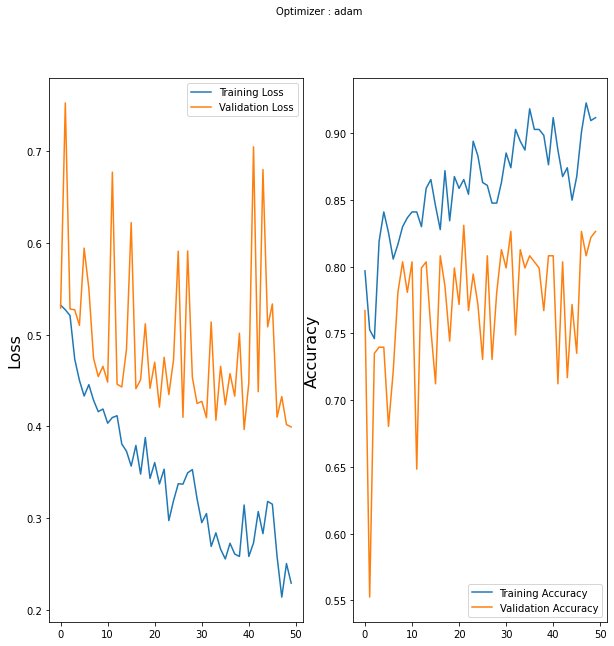

In [ ]:
#callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
hist = model1.fit_generator(train_set, validation_data=test_set, epochs=50, steps_per_epoch=len(train_set), validation_steps=len(test_set))

import matplotlib.pyplot as plt

x=hist
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
#Saving File

from tensorflow.keras.models import load_model
model1.save('model_resnet50.h5')

In [ ]:
from google.colab import files
files.download('model_resnet50.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

For InceptionV3 with optimiser adam

In [ ]:
# create the base pre-trained model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
base_model = InceptionV3(weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x2 = base_model.output
x2 = GlobalAveragePooling2D()(x2)
'''
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
'''
predictions = Dense(2, activation='softmax')(x2)

# this is the model we will train
model2 = Model(inputs=base_model.input, outputs=predictions)
model2.summary()
# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False



Model: "functional_20"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, None, None, 3 864         input_11[0][0]                   
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, None, None, 3 96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, None, None, 3 0           batch_normalization_94[0][0]     
______________________________________________________________________________________

Epoch 1/50
15/15 [==============================] - 18s 1s/step - loss: 0.6523 - accuracy: 0.6556 - val_loss: 0.6196 - val_accuracy: 0.6575
Epoch 2/50
15/15 [==============================] - 16s 1s/step - loss: 0.4331 - accuracy: 0.8322 - val_loss: 0.5830 - val_accuracy: 0.7032
Epoch 3/50
15/15 [==============================] - 16s 1s/step - loss: 0.3483 - accuracy: 0.8874 - val_loss: 0.4932 - val_accuracy: 0.7854
Epoch 4/50
15/15 [==============================] - 16s 1s/step - loss: 0.3277 - accuracy: 0.8720 - val_loss: 0.4840 - val_accuracy: 0.7900
Epoch 5/50
15/15 [==============================] - 16s 1s/step - loss: 0.2623 - accuracy: 0.8918 - val_loss: 0.4476 - val_accuracy: 0.7763
Epoch 6/50
15/15 [==============================] - 16s 1s/step - loss: 0.2217 - accuracy: 0.9316 - val_loss: 0.4234 - val_accuracy: 0.8128
Epoch 7/50
15/15 [==============================] - 17s 1s/step - loss: 0.2346 - accuracy: 0.9117 - val_loss: 0.4131 - val_accuracy: 0.8037
Epoch 8/50
15/15 [==

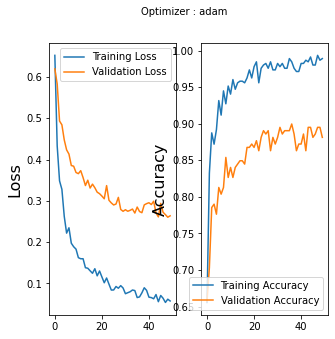

In [ ]:
# compile the model (should be done *after* setting layers to non-trainable)

model2.compile(optimizer='Adam', loss='categorical_crossentropy',metrics=['accuracy'])
#callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
hist = model2.fit_generator(train_set, validation_data=test_set, epochs=50, steps_per_epoch=len(train_set), validation_steps=len(test_set))

import matplotlib.pyplot as plt

x=hist
plt.figure(figsize=(5,5))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
#Saving File

model2.save('inceptionv3.h5')

with rmsprop and default learning rate optimiser

In [ ]:
#Performance Evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_p=models.predict(test_set,verbose=1,steps=len(test_set))
y_pr=np.argmax(y_p,axis=1)
cm1=confusion_matrix(test_set.classes,y_pr)
total1=sum(sum(cm1))
#from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)
print(classification_report(test_set.classes, y_pr))

FOR VGG16

In [ ]:
vgg19=VGG19(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
x1= Flatten()(vgg19.output)
prediction1 = Dense(len(folder), activation='softmax')(x1)
model3 = Model(inputs = vgg19.inputs, outputs = prediction1)
model3.summary()
model3.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Model: "functional_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)     

In [ ]:
r1 = model3.fit_generator(train_set, validation_data=test_set, epochs=50, steps_per_epoch=len(train_set), validation_steps=len(test_set))

Epoch 1/50
15/15 [==============================] - 20s 1s/step - loss: 5.6803 - accuracy: 0.4768 - val_loss: 0.7162 - val_accuracy: 0.4566
Epoch 2/50
15/15 [==============================] - 19s 1s/step - loss: 0.6653 - accuracy: 0.5850 - val_loss: 0.5871 - val_accuracy: 0.6164
Epoch 3/50
15/15 [==============================] - 19s 1s/step - loss: 0.5807 - accuracy: 0.6887 - val_loss: 0.5058 - val_accuracy: 0.8311
Epoch 4/50
15/15 [==============================] - 19s 1s/step - loss: 0.4016 - accuracy: 0.8035 - val_loss: 0.3349 - val_accuracy: 0.8767
Epoch 5/50
15/15 [==============================] - 19s 1s/step - loss: 0.2054 - accuracy: 0.9073 - val_loss: 0.3356 - val_accuracy: 0.8950
Epoch 6/50
15/15 [==============================] - 19s 1s/step - loss: 0.4000 - accuracy: 0.8234 - val_loss: 0.6616 - val_accuracy: 0.7352
Epoch 7/50
15/15 [==============================] - 19s 1s/step - loss: 0.1647 - accuracy: 0.9316 - val_loss: 0.3402 - val_accuracy: 0.8858
Epoch 8/50
15/15 [==

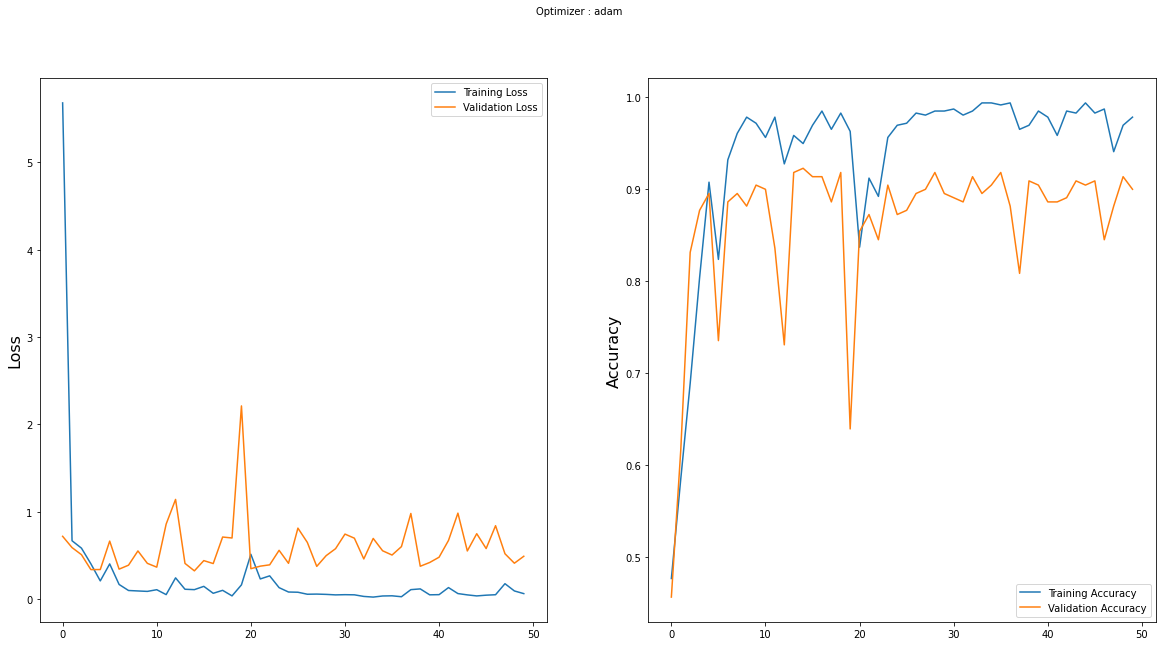

In [ ]:
import matplotlib.pyplot as plt

x=r1
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(x.history['loss'], label='Training Loss')
plt.plot(x.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(x.history['accuracy'], label='Training Accuracy')
plt.plot(x.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:

#Saving File

model3.save('vgg19.h5')

In [ ]:
#Uploading the file

from google.colab import files
uploaded = files.upload()

Saving 1-s2.0-S0378603X1500248X-gr3b.jpg to 1-s2.0-S0378603X1500248X-gr3b.jpg


In [ ]:
from tensorflow.keras.models import load_model

model1 = load_model('model_resnet50.h5')
model2 = load_model('inceptionv3.h5')
model3 = load_model('vgg19.h5')

models = [model1, model2, model3]



In [ ]:
def ensemble_predictions(members, testX):
  yhats = [model.predict(testX) for model in members]
  yhats = np.array(yhats)
  # sum across ensemble members
  summed = np.sum(yhats, axis=0)
  # argmax across classes
  result = np.argmax(summed, axis=1)
  return result
  



In [ ]:
# Image index
i = 0
# 1. load image and resize
for file in os.listdir(test_path_c):
    if file.endswith(".jpg"):
            # Load the image
        img = plt.imread(test_path_c + file)
            # Resize it to the net input size:
        img = cv2.resize(img, (224, 224))
        img = img[np.newaxis, ...]

            # Convert the data to float:
        img = img.astype(np.float32)

            # Predict class by picking the highest probability index
            # then add 1 (due to indexing behavior)
        class_index = ensemble_predictions(models, img)[0]

            # Convert class id to name
        label = class_names[class_index]

        fp.write("%d,%s\n" % (i, label))

        print(i)
        i += 1


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_p=model3.predict(test_set,verbose=1,steps=len(test_set))
y_pr=np.argmax(y_p,axis=1)
cm1=confusion_matrix(test_set.classes,y_pr)
total1=sum(sum(cm1))
#from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)
print(classification_report(test_set.classes, y_pr))

7/7 [==============================] - 4s 622ms/step
Accuracy :  0.5616438356164384
Sensitivity :  0.44
Specificity :  0.6638655462184874
              precision    recall  f1-score   support

           0       0.52      0.44      0.48       100
           1       0.59      0.66      0.62       119

    accuracy                           0.56       219
   macro avg       0.55      0.55      0.55       219
weighted avg       0.56      0.56      0.56       219



In [ ]:
# example of predicting
import cv2
img = plt.imread('/content/1-s2.0-S0378603X1500248X-gr4e.jpg')
# Resize it to the net input size:
img = cv2.resize(img, (224, 224))
img = img[np.newaxis, ...]



In [ ]:
img

array([[[[16., 16., 16.],
         [ 8.,  8.,  8.],
         [ 7.,  7.,  7.],
         ...,
         [ 7.,  7.,  7.],
         [ 7.,  7.,  7.],
         [47., 47., 47.]],

        [[ 9.,  9.,  9.],
         [ 1.,  1.,  1.],
         [ 0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.],
         [ 1.,  1.,  1.],
         [41., 41., 41.]],

        [[10., 10., 10.],
         [ 1.,  1.,  1.],
         [ 0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         [42., 42., 42.]],

        ...,

        [[ 9.,  9.,  9.],
         [ 0.,  0.,  0.],
         [ 1.,  1.,  1.],
         ...,
         [46., 46., 46.],
         [30., 30., 30.],
         [44., 44., 44.]],

        [[10., 10., 10.],
         [ 0.,  0.,  0.],
         [ 0.,  0.,  0.],
         ...,
         [17., 17., 17.],
         [ 9.,  9.,  9.],
         [42., 42., 42.]],

        [[22., 22., 22.],
         [13., 13., 13.],
         [14., 14., 14.],
         ...,
         [14., 14., 14.],
        

In [ ]:
# Convert the data to float:
img = img.astype(np.float32)

class_index = ensemble_predictions(models, img)[0]


In [ ]:
class_index

0